# Linear Regression

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [35]:
df = pd.read_csv("USA_Housing.csv")
#Loading a DataFrame of csv format
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [36]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [38]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

(array([  1.00000000e+00,   2.00000000e+00,   6.70000000e+01,
          3.46000000e+02,   1.05500000e+03,   1.60100000e+03,
          1.30400000e+03,   5.13000000e+02,   1.02000000e+02,
          9.00000000e+00]),
 array([  17796.63118954,   26787.14290835,   35777.65462716,
          44768.16634597,   53758.67806478,   62749.18978359,
          71739.7015024 ,   80730.21322121,   89720.72494002,
          98711.23665883,  107701.74837764]),
 <a list of 10 Patch objects>)

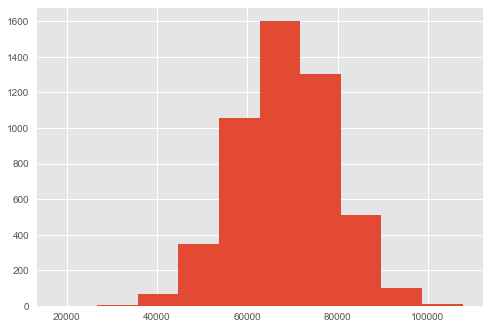

In [46]:
plt.style.use("ggplot")
plt.hist(df['Avg. Area Income'])

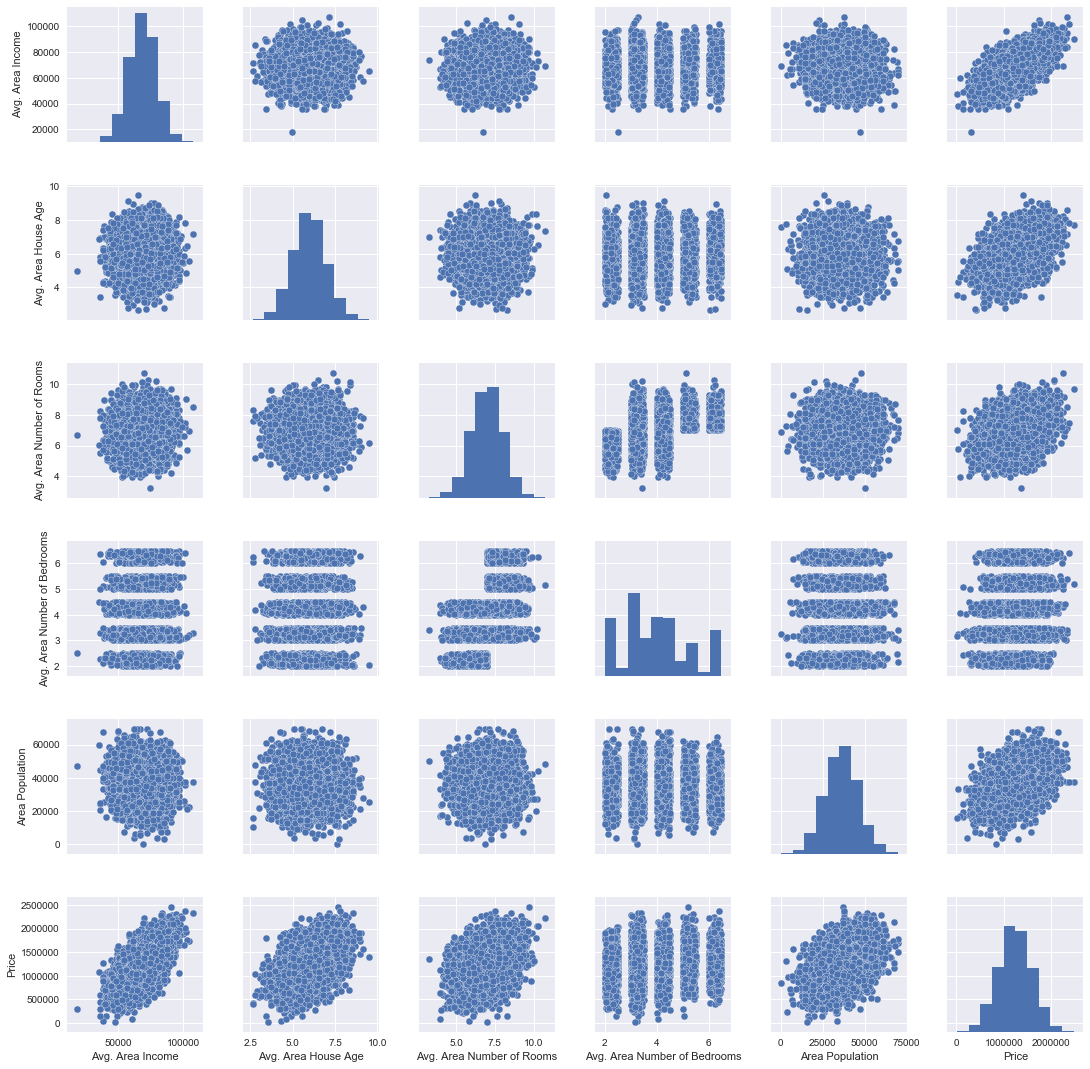

In [6]:
# Vizual EDA

sns.pairplot(df, palette =  'coolwarm')

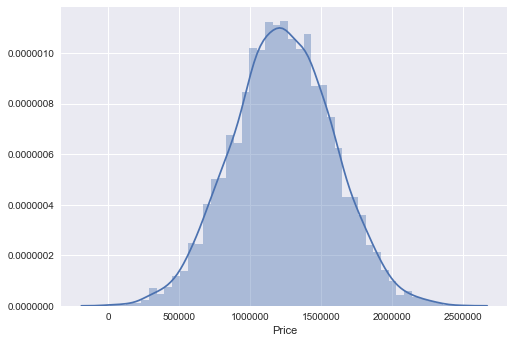

In [7]:
sns.distplot(df.Price)

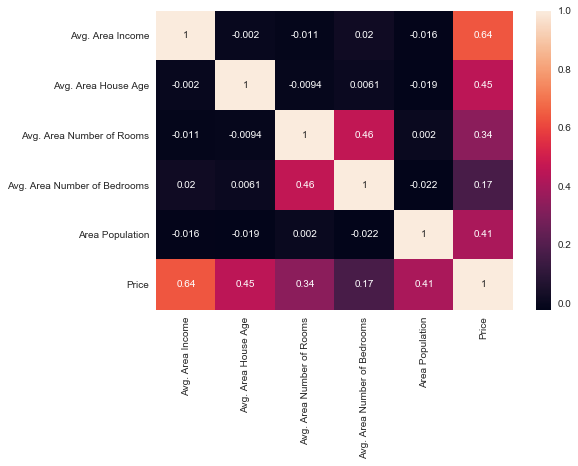

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
#features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [11]:
#Labels / Target variable
y = df["Price"]

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [14]:
# Training the model

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#test the model

lm.score(X_test, y_test)

0.91768240096492004

In [16]:
print(lm.intercept_)

-2640159.79685


In [17]:
pd.DataFrame(lm.coef_, X.columns, columns= ['coeficient'])

,coeficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predictions

In [18]:
predictions = lm.predict(X_test)
predictions

array([ 1260960.70567626,   827588.75560352,  1742421.24254328, ...,
         372191.40626952,  1365217.15140895,  1914519.54178824])

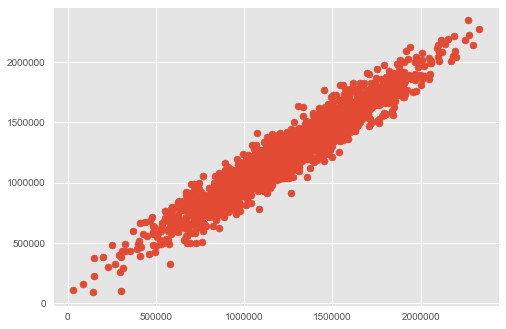

In [19]:
plt.style.use("ggplot")
plt.scatter(y_test, predictions)

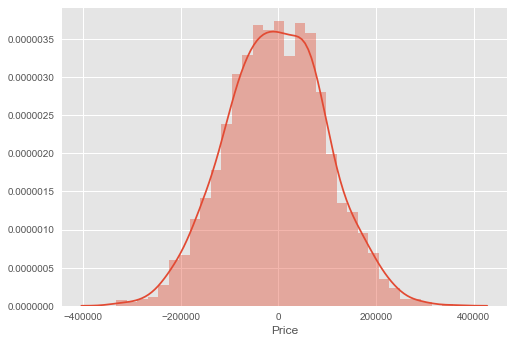

In [20]:
# if the plot is normal Your model selection choice is good
sns.distplot((y_test-predictions))


** Caliculting Metrics**

In [21]:
from sklearn import metrics
#Absolute mean square
metrics.mean_absolute_error(y_test, predictions)

82288.222519149567

In [22]:
#mean Square
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [23]:
#Root mean Square
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

# Logistic Regression
**Bineray Classification**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  
plt.style.use("seaborn")

In [63]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


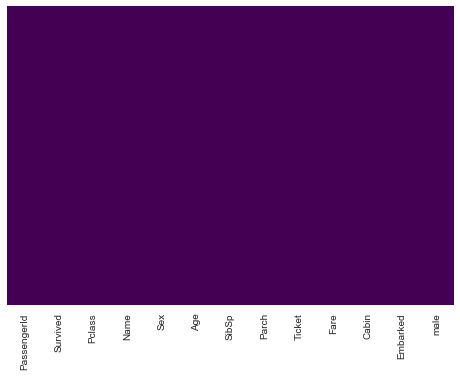

In [82]:
sns.set_style("whitegrid")
sns.heatmap(df.isnull(), yticklabels = False , cbar=False, cmap = 'viridis')

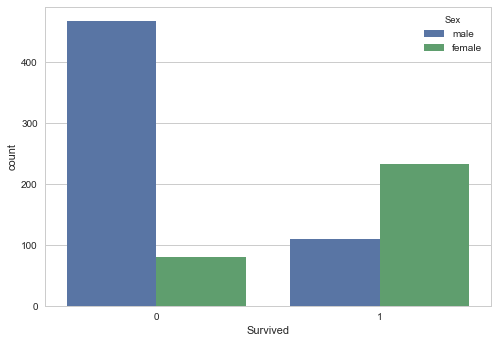

In [65]:
sns.countplot(x = 'Survived',hue = 'Sex', data = df)

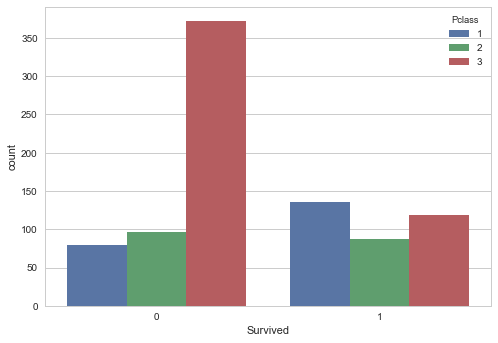

In [66]:
sns.countplot(x = "Survived", hue  = "Pclass", data = df )

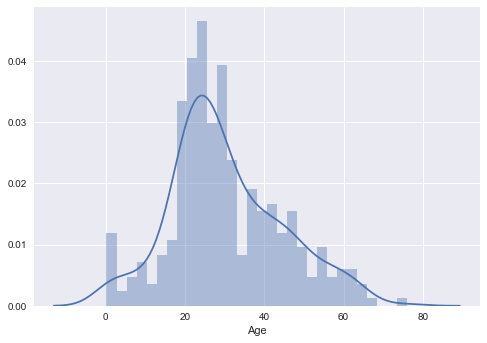

In [35]:
sns.distplot(df['Age'].dropna(), bins = 30)

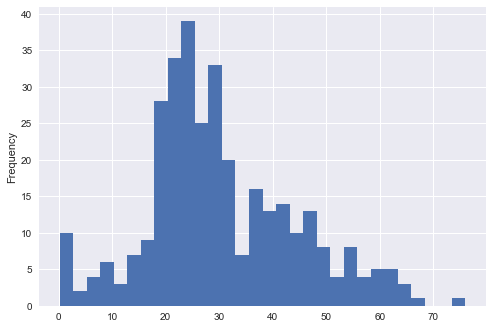

In [33]:
df['Age'].plot.hist(bins = 30)

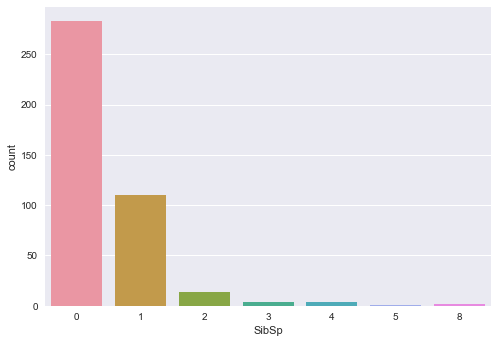

In [34]:
sns.countplot(x = 'SibSp', data = df)

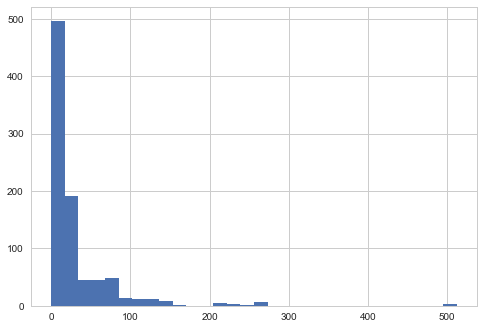

In [72]:
df['Fare'].hist(bins  = 30)

** Cleaning the data **

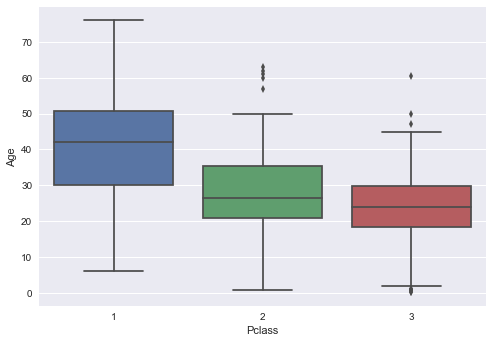

In [36]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)


In [76]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [79]:
df = pd.concat([df, sex], axis = 1)

In [80]:
df.dropna(inplace = True)

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1


** Test **

In [120]:
df = pd.read_csv("titanic_test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


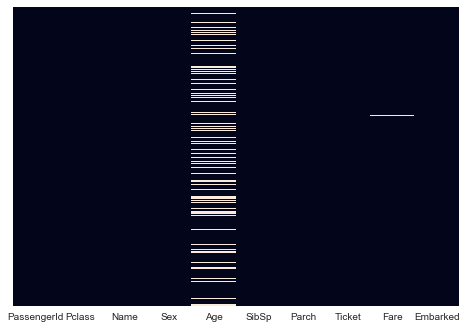

In [124]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False)

In [125]:
df.drop(['Cabin'], axis= 1, inplace=True)

ValueError: labels ['Cabin'] not contained in axis

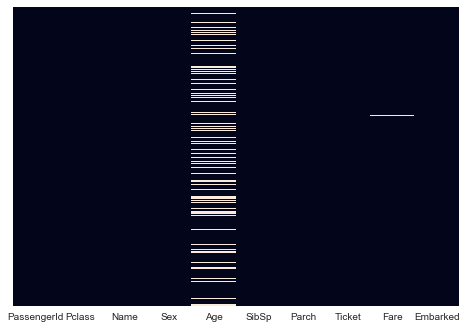

In [126]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False)

In [127]:
df['Fare'].fillna(method = 'ffill', inplace = True)

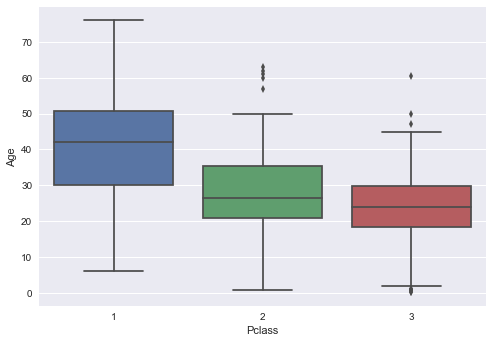

In [128]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [129]:
def  impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 42
        elif pclass == 2:
            return 26
        elif pclass ==3:
            return 23
    else :
            return age

In [130]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

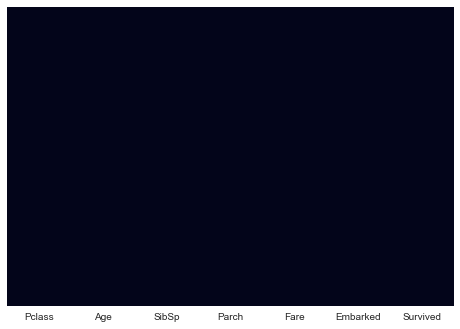

In [151]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
logmodel = LogisticRegression()

In [133]:
df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [134]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True)
df['Embarked'] = pd.get_dummies(df['Embarked'], drop_first=True )
df.drop(['Name', 'Sex'], axis=1, inplace = True )

In [135]:
df.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [149]:
df = df.head(400)

In [137]:
df = pd.concat([df, m], axis  = 1)

In [139]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,34.5,0,0,7.8292,1,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,0,0


In [118]:

k = pd.read_csv('titanic_train.csv')
m = k['Survived'].head(418) 

In [153]:

X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33)

In [155]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
prediction = logmodel.predict(X_test)

In [159]:
from sklearn import metrics

In [161]:
#Classification Report on the Predictions

print(metrics.classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.65      0.94      0.77        84
          1       0.50      0.10      0.17        48

avg / total       0.59      0.64      0.55       132



In [163]:
# Confusion Matics

metrics.confusion_matrix(y_test, prediction)

array([[79,  5],
       [43,  5]], dtype=int64)